<a href="https://colab.research.google.com/github/honggi82/Software_application_lecture/blob/main/CNN_custom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 라이브러리 가져오기

In [2]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, pooling, Flatten, Dense
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

# Training 데이터셋 불러오기
"http://content/gdrive/MyDrive/software/"는 데이터셋이 있는 폴더 위치로 다른 경우 변경해야 함.
각 사진 파일은 "face숫자_숫자.jpg"란 이름으로 저장되어 있으며, 앞의 숫자는 class를 뒤의 숫자는 몇 번째 데이터인지를 나타내는 숫자임.
아래 코드는 class가 0, 1, 2가 있으며, 데이터가 100개 있는 경우에 대한 코드임.

In [7]:
train_X=[]; test_X=[]; train_Y=[]; test_Y=[]; 

for i in range(0,100): # 데이터셋 100개를 training 용으로 읽어오는 코드
    img=cv2.imread("/content/gdrive/MyDrive/software/face0_"+str(i)+".jpg") 
    train_X.append(cv2.resize(img,(50,50))) # 사진 크기를 50*50으로 변경해주는 코드
    train_Y.append(0)
    img=cv2.imread("/content/gdrive/MyDrive/software/face1_"+str(i)+".jpg")
    train_X.append(cv2.resize(img,(50,50)))
    train_Y.append(1)
    img=cv2.imread("/content/gdrive/MyDrive/software/face2_"+str(i)+".jpg")
    train_X.append(cv2.resize(img,(50,50)))
    train_Y.append(2)

# 데이터를 numpy array로 변경

In [8]:
train_X=np.array(train_X)
train_Y=np.array(train_Y)

# 샘플 테이터 그려보기

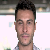

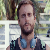

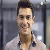

0
1
2


In [9]:
cv2_imshow(train_X[0]); cv2_imshow(train_X[1]); cv2_imshow(train_X[2]);
print(train_Y[0]); print(train_Y[1]); print(train_Y[2]);

# Test 데이터셋 불러오기

In [10]:
for i in range(100,200):
    img=cv2.imread("/content/gdrive/MyDrive/software/face0_"+str(i)+".jpg")
    test_X.append(cv2.resize(img,(50,50)))
    test_Y.append(0)
    img=cv2.imread("/content/gdrive/MyDrive/software/face1_"+str(i)+".jpg")
    test_X.append(cv2.resize(img,(50,50)))
    test_Y.append(1)
    img=cv2.imread("/content/gdrive/MyDrive/software/face2_"+str(i)+".jpg")
    test_X.append(cv2.resize(img,(50,50)))
    test_Y.append(2)

# 데이터를 numpy array로 변경

In [11]:
test_X=np.array(test_X)
test_Y=np.array(test_Y)

# 샘플 테이터 그려보기

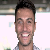

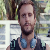

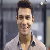

0
1
2


In [12]:
cv2_imshow(test_X[0]); cv2_imshow(test_X[1]); cv2_imshow(test_X[2]); 
print(test_Y[0]); print(test_Y[1]); print(test_Y[2]);

# 데이터 정규화

In [13]:
train_X = train_X.astype('float32')/255.0 
test_X = test_X.astype('float32')/255.0

# One-Hot Encoding

In [14]:
train_Y = np_utils.to_categorical(train_Y) 
test_Y = np_utils.to_categorical(test_Y) 

# CNN 모델 생성

In [15]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', strides=(1,1), activation='relu', input_shape=(50,50,3)),
    pooling.MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), padding='same', strides=(1,1), activation='relu'),
    pooling.MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(3, activation='softmax')])
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 3)                 2

# Training

In [16]:
history=model.fit(train_X, train_Y, batch_size=8, epochs=5) 

Epoch 1/5
38/38 [==============================] - 3s 36ms/step - loss: 0.3147 - accuracy: 0.8867
Epoch 2/5
38/38 [==============================] - 2s 61ms/step - loss: 8.7167e-05 - accuracy: 1.0000
Epoch 3/5
38/38 [==============================] - 2s 62ms/step - loss: 2.7972e-05 - accuracy: 1.0000
Epoch 4/5
38/38 [==============================] - 2s 64ms/step - loss: 2.2961e-05 - accuracy: 1.0000
Epoch 5/5
38/38 [==============================] - 2s 64ms/step - loss: 1.9827e-05 - accuracy: 1.0000


# Test

In [17]:
_, accuracy = model.evaluate(test_X, test_Y)
print('Accuracy: ', accuracy)

10/10 [==============================] - 1s 45ms/step - loss: 1.2609e-04 - accuracy: 1.0000
Accuracy:  1.0


# Loss 그리기

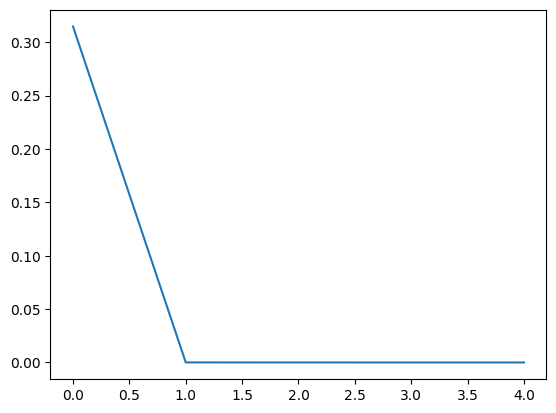

In [18]:
plt.plot(history.history['loss'], label='loss')

# n번째 데이터 예측 후 실제 값과 비교

10/10 [==============================] - 1s 59ms/step


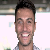

Prediction: [9.99980867e-01 1.45509175e-05 4.50890184e-06]
Real: [1. 0. 0.]


In [19]:
trial=0
pred=model.predict(test_X)
cv2_imshow(test_X[trial]*255);
print("Prediction: " + str(pred[trial]))
print("Real: " + str(test_Y[trial]))